VGG16 Model

In [61]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# 데이터 불러오기
# Kaggle에서 제공되는 개, 고양이 데이터

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip',
                                      origin = _URL,
                                      extract = True)

path = os.path.join(os.path.dirname(path_to_zip),
                    'cats_and_dogs_filtered')

In [63]:
# Train, Validation 데이터 셋을 각각의 변수에 할당

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [64]:
# train파일에 저장된 고양이 사진 경로 보기
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# train파일에 저장된 강아지 사진 경로 보기
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# validation 파일에 저장된 고양이 사진 경로 보기
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# validation 파일에 저장된 강아지 사진 경로 보기
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [65]:
# trina데이터와 validation 데이터의 개수보기.

# train
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)

num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("- - " * 8)

# validation
num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)

num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("- - " * 8)

# train 강아지 + 고양이 / validation 강아지 + 고양이

total_train = num_cats_tr + num_dogs_tr
print("Total training images :", total_train)

total_validation = num_cats_val + num_dogs_val
print("Total training images :", total_validation)



total training cat images: 1000
total training dog images: 1000
- - - - - - - - - - - - - - - - 
total validation cat images: 500
total validation dog images: 500
- - - - - - - - - - - - - - - - 
Total training images : 2000
Total training images : 1000


In [66]:
# 필요한 파라미터를 설정해 준다.

# Parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [67]:
# 데이터를 시각화하기
def plotImages(images_arr) :
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()

    for img, ax in zip(images_arr, axes) :
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [68]:
# train데이터가 2천장으로 데이터 증강 필요
# Data Augmentaion(데이터 증강), 데이터 수를 늘려준다.

# Rescale, Totation, Random Crop, Zoom, Flip등 다양한 기법을 사용하여 데이터의 양을 증가 시킨다.

# Training data generator
image_gen_train = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 0.3,
                                     width_shift_range = 0.1,
                                     height_shift_range = 0.1,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = False)

In [69]:
# .flow_from_directory를 사용하여 파이프라인 생성
# directory와 작업 환경을 연결
# Classification task에 따라 class_mode를 변경시켜 주면 된다.

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                                    directory = train_dir,
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [70]:
# Data Augmentation(데이터 증강)이 제대로 되었는지 확인.
train_data_gen[0][0].shape

(16, 256, 256, 3)

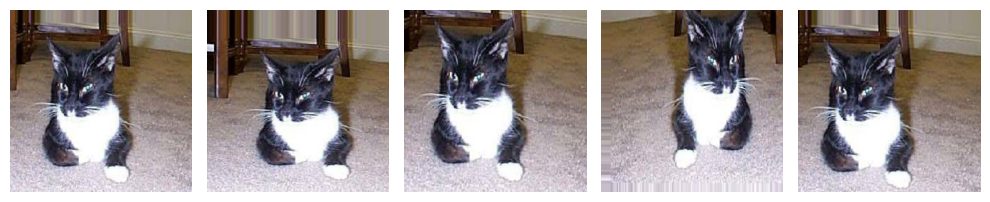

In [71]:
# 이미지로 추력
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [72]:
# Validaton data generator
# 평가용도로만 사용하기 때문에 스케일만 변경해 준다.
image_gen_val = ImageDataGenerator(rescale = 1./255)

In [73]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


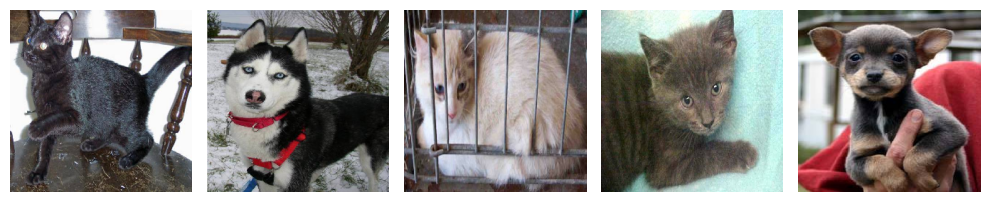

In [74]:
# Validation데이터 확인
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [75]:
_[:5] # 정답 데이터

array([0., 1., 0., 0., 1.], dtype=float32)

In [76]:
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(2048, activation='relu')(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 84,454,977 (322.17 MB)

 Trainable params: 84,452,033 (322.16 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [77]:
# 손실함수, optimizer, metric 설정.
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [78]:
history = model.fit(train_data_gen,
                    steps_per_epoch = int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
                    epochs = epochs,
                    validation_data = val_data_gen,
                    validation_freq = 1)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 403ms/step - binary_accuracy: 0.5169 - loss: 282.7325 - val_binary_accuracy: 0.5000 - val_loss: 1.2371
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 1.2371
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 52s 401ms/step - binary_accuracy: 0.4972 - loss: 0.7008 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 391ms/step - binary_accuracy: 0.5057 - loss: 0.6936 - val_binary_accuracy: 0.5000 - val_loss: 0.6932


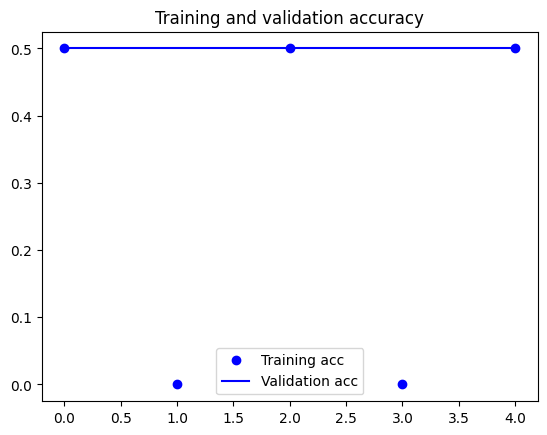

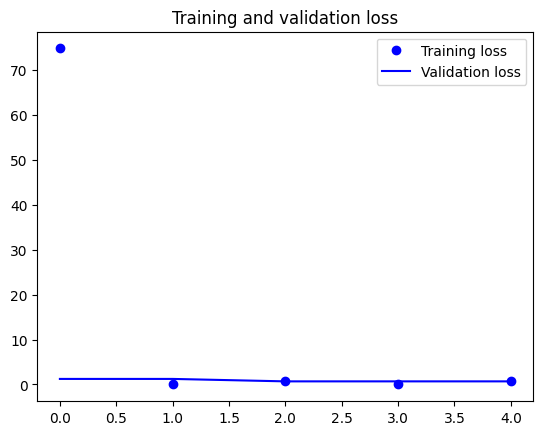

In [79]:
# 학습이 된 모델 시각화를 통해 정확도 확인.
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()